In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
message = pd.read_csv('SMSSpamCollection (2)', sep='\t',names=['label','message'],encoding="latin1")

In [3]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
message.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
message.groupby('label').describe() #imbalance data

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
message['length'] = message['message'].apply(len)
message

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<Axes: ylabel='Frequency'>

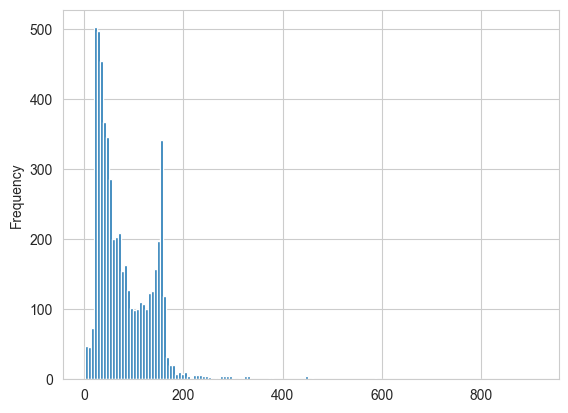

In [7]:
message['length'].plot.hist(bins=150)

In [8]:
message[message['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [9]:
message[message['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

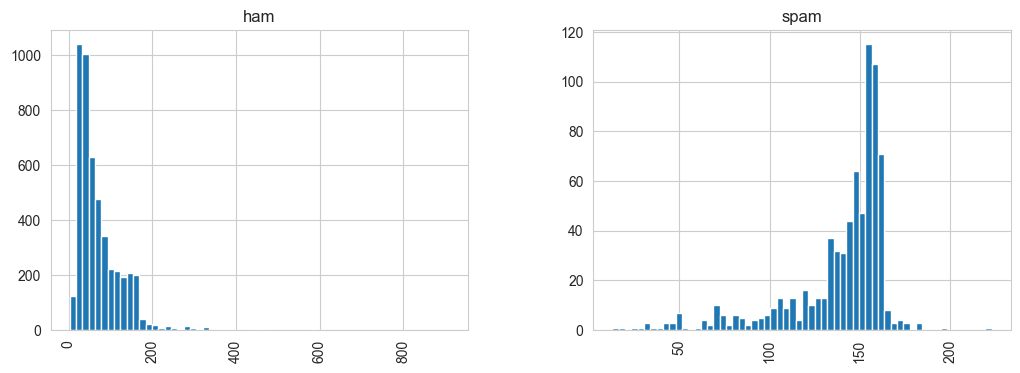

In [10]:
message.hist(column='length',by='label',bins=60,figsize=(12,4))

In [11]:
import string
mess = 'Sample message ! Notice: it has punctuations.'

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
nopunc = [c for c in mess if c not in string.punctuation]

In [14]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [15]:
nopunc = ''.join(nopunc)

In [16]:
nopunc

'Sample message  Notice it has punctuations'

In [17]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [19]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
clean_mess

['Sample', 'message', 'Notice', 'punctuations']

In [21]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [22]:
mess

'Sample message ! Notice: it has punctuations.'

In [23]:
text_process(mess)

['Sample', 'message', 'Notice', 'punctuations']

In [24]:
message['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['message'])

In [27]:
mess4 = message['message'][3]

In [28]:
mess4

'U dun say so early hor... U c already then say...'

In [29]:
bow4 = bow_transformer.transform([mess4]).toarray()

In [30]:
bow4.shape

(1, 11396)

In [31]:
message_bow = bow_transformer.transform(message['message'])

In [32]:
message_bow

<5572x11396 sparse matrix of type '<class 'numpy.int64'>'
	with 50529 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [34]:
tfidf4 = tfidf_transformer.transform(bow4)

In [35]:
tfidf4.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [36]:
message_tfidf = tfidf_transformer.transform(message_bow)

In [37]:
message_tfidf

<5572x11396 sparse matrix of type '<class 'numpy.float64'>'
	with 50529 stored elements in Compressed Sparse Row format>

In [38]:
message_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [40]:
spam_detection_model = MultinomialNB().fit(message_tfidf,message['label'])

In [41]:
spam_detection_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [42]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['label'],test_size=0.3)

In [43]:
msg_train.shape

(3900,)

In [44]:
msg_test.shape

(1672,)

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(n_estimators=10))
    ])

In [47]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E57EBD9C10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [48]:
predictions = pipeline.predict(msg_test)

In [49]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(label_test,predictions))

[[1440    0]
 [  62  170]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1440
        spam       1.00      0.73      0.85       232

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672

